<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li></ul></div>

## Load data

In [1]:
from mantisshrimp.all import *
import pandas as pd

In [2]:
source = Path('/home/lgvaz/.data/imaterialist/')

In [3]:
df = pd.read_csv(source/'train.csv', nrows=1000)

In [4]:
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [5]:
o = df.iloc[0]

In [6]:
ImageParser??

In [7]:
class MaterialInfoParser(ImageParser):
    def __iter__(self): return self.data.itertuples()
    def iid(self, o): return o.ImageId
    def file_path(self, o): return self.source/f'train/{o.ImageId}.jpg'
    def height(self, o): return o.Height
    def width(self, o): return o.Width
    def oid(self, o): return o.ClassId # TODO: AttributeIds

In [8]:
class MaterialAnnotParser(AnnotationParser):
    def iid(self, o): return o.ImageId
    def seg(self, o): return RLE(o.EncodedPixels)

In [25]:
rle = RLE(lmap(int, o.EncodedPixels.split()))

In [26]:
erle = rle.to_erle(o.Height, o.Width)

In [21]:
erle2 = {'counts':b'YQ`09g=20N17D8M5L5L4L02M1O1M3^Ob0K6LjmX:', 'size': [450, 800]}

In [22]:
mask2 = mask_utils.decode(erle2)

In [36]:
type(erle2['size'][0])

int

In [35]:
type(erle[0]['size'][1])

int

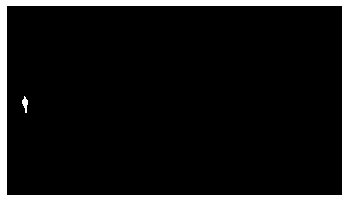

In [23]:
show_img(mask2)

In [17]:
erle = rle.to_erle()

TypeError: to_erle() missing 2 required positional arguments: 'h' and 'w'

In [19]:
type(o.Height)

numpy.int64

In [ ]:
rle.to_mask(int(o.Height), int(o.Width))

> /home/lgvaz/git/mantisshrimp2/mantisshrimp/data/annotation.py(60)to_mask()
-> mask = mask_utils.decode(erle).sum(axis=-1)
(Pdb) c


In [12]:
RLE??

In [27]:
AnnotationParser??

In [24]:
test = MaterialInfoParser(df, source).parse()

In [26]:
test[0]

ImageInfo(iid='00000663ed1ff0c4e0132b9b9ac53f6e', fp=Path('/home/lgvaz/.data/imaterialist/train/00000663ed1ff0c4e0132b9b9ac53f6e.jpg'), split=1, h=5214, w=3676)

In [8]:
iid = o.ImageId

In [19]:
source/f'train/{o.ImageId}.jpg'

Path('/home/lgvaz/.data/imaterialist/train/00000663ed1ff0c4e0132b9b9ac53f6e.jpg')

In [15]:
source.ls()

(#7) [Path('/home/lgvaz/.data/imaterialist/test'),Path('/home/lgvaz/.data/imaterialist/imaterialist-fashion-2020-fgvc7.zip'),Path('/home/lgvaz/.data/imaterialist/train'),Path('/home/lgvaz/.data/imaterialist/label_descriptions.json'),Path('/home/lgvaz/.data/imaterialist/train.csv'),Path('/home/lgvaz/.data/imaterialist/sample_submission.csv'),Path('/home/lgvaz/.data/imaterialist/tmp')]

In [16]:
(source/'train').ls()

(#45623) [Path('/home/lgvaz/.data/imaterialist/train/a1dbc3cef78218105f93a4555981985b.jpg'),Path('/home/lgvaz/.data/imaterialist/train/c86008a455b9de99a7498f187d63bd56.jpg'),Path('/home/lgvaz/.data/imaterialist/train/fdbea88aeaa93ac7dbcb38d07b917e7d.jpg'),Path('/home/lgvaz/.data/imaterialist/train/39247a9fed69bf43938d3a753482481d.jpg'),Path('/home/lgvaz/.data/imaterialist/train/6f839242d6fde5f1f739539a7b41e4a2.jpg'),Path('/home/lgvaz/.data/imaterialist/train/af18f2e40a23dbbc16d77ba5b6c4fc39.jpg'),Path('/home/lgvaz/.data/imaterialist/train/3bae206aaa7253fa93a38abb6b405c8e.jpg'),Path('/home/lgvaz/.data/imaterialist/train/a565230a42fa0753bd2b17c6bb37118f.jpg'),Path('/home/lgvaz/.data/imaterialist/train/9dfefa1912600535f61f900cc2f6fd32.jpg'),Path('/home/lgvaz/.data/imaterialist/train/b96235ee5ae6a81baf28fefbe518c878.jpg')...]

In [3]:
source.ls()

(#7) [Path('/home/lgvaz/.data/imaterialist/test'),Path('/home/lgvaz/.data/imaterialist/imaterialist-fashion-2020-fgvc7.zip'),Path('/home/lgvaz/.data/imaterialist/train'),Path('/home/lgvaz/.data/imaterialist/label_descriptions.json'),Path('/home/lgvaz/.data/imaterialist/train.csv'),Path('/home/lgvaz/.data/imaterialist/sample_submission.csv'),Path('/home/lgvaz/.data/imaterialist/tmp')]